Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [1]:
# Import required library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

### Q1. Load the dataset 

In [2]:
df = pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.drop('name',axis=1,inplace=True)

### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [4]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

<AxesSubplot:>

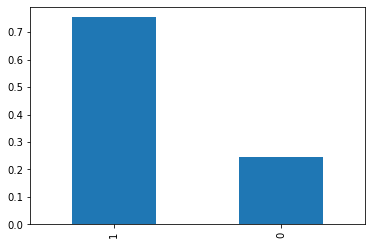

In [5]:
df['status'].value_counts(normalize=True).plot(kind='bar')

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [6]:
(df.isnull().sum()/len(df))*100

MDVP:Fo(Hz)         0.0
MDVP:Fhi(Hz)        0.0
MDVP:Flo(Hz)        0.0
MDVP:Jitter(%)      0.0
MDVP:Jitter(Abs)    0.0
MDVP:RAP            0.0
MDVP:PPQ            0.0
Jitter:DDP          0.0
MDVP:Shimmer        0.0
MDVP:Shimmer(dB)    0.0
Shimmer:APQ3        0.0
Shimmer:APQ5        0.0
MDVP:APQ            0.0
Shimmer:DDA         0.0
NHR                 0.0
HNR                 0.0
status              0.0
RPDE                0.0
DFA                 0.0
spread1             0.0
spread2             0.0
D2                  0.0
PPE                 0.0
dtype: float64

Clearly seen that there are no missing values in the data frame

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

Column name:  MDVP:Fo(Hz)


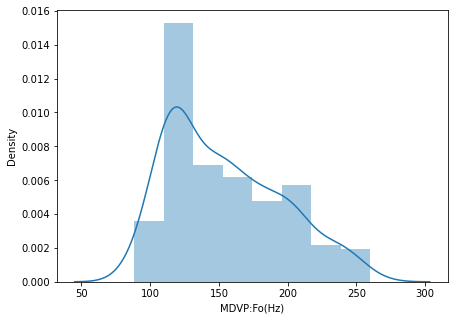

MDVP:Fo(Hz)  skew is:  0.5917374636540784


Column name:  MDVP:Fhi(Hz)


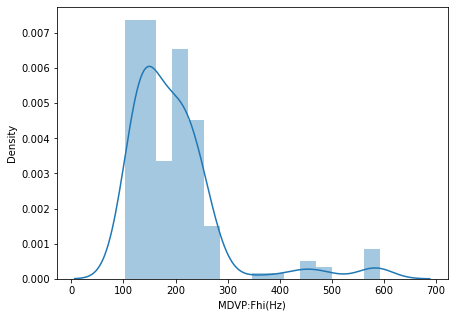

MDVP:Fhi(Hz)  skew is:  2.542145997588398


Column name:  MDVP:Flo(Hz)


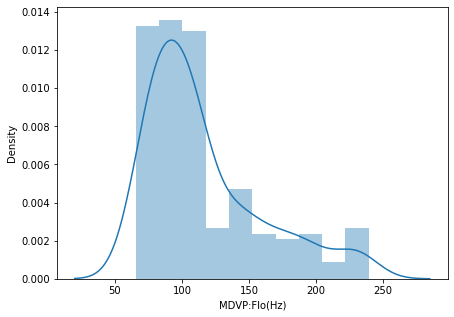

MDVP:Flo(Hz)  skew is:  1.217350448627808


Column name:  MDVP:Jitter(%)


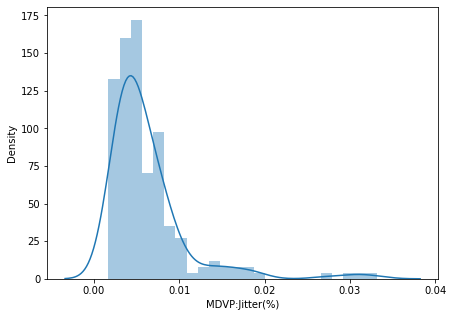

MDVP:Jitter(%)  skew is:  3.0849462014441817


Column name:  MDVP:Jitter(Abs)


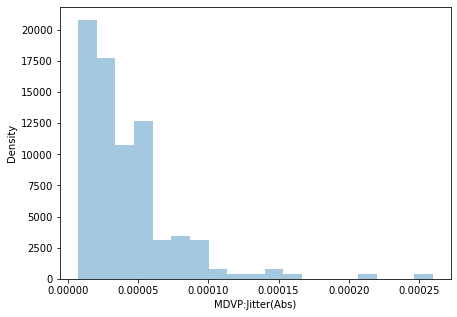

MDVP:Jitter(Abs)  skew is:  2.6490714165257274


Column name:  MDVP:RAP


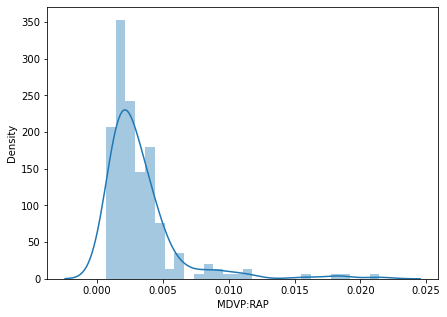

MDVP:RAP  skew is:  3.360708450480554


Column name:  MDVP:PPQ


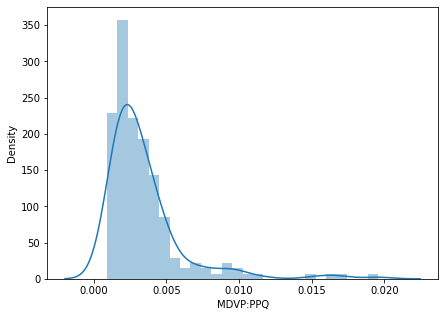

MDVP:PPQ  skew is:  3.073892457888517


Column name:  Jitter:DDP


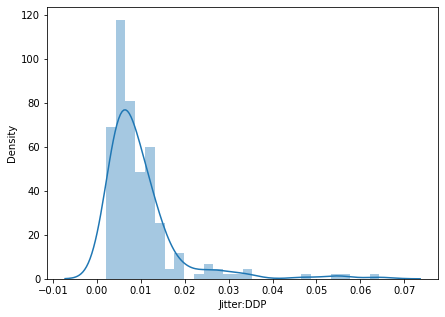

Jitter:DDP  skew is:  3.3620584478857203


Column name:  MDVP:Shimmer


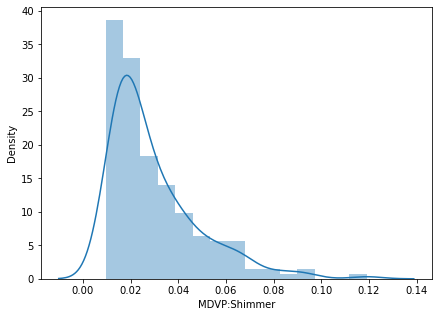

MDVP:Shimmer  skew is:  1.6664804101559663


Column name:  MDVP:Shimmer(dB)


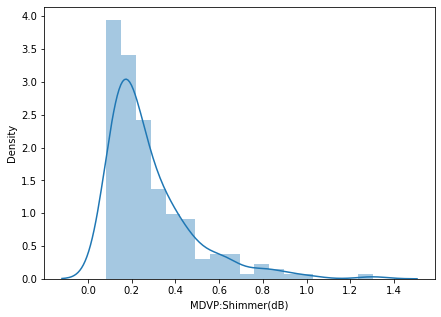

MDVP:Shimmer(dB)  skew is:  1.999388639086127


Column name:  Shimmer:APQ3


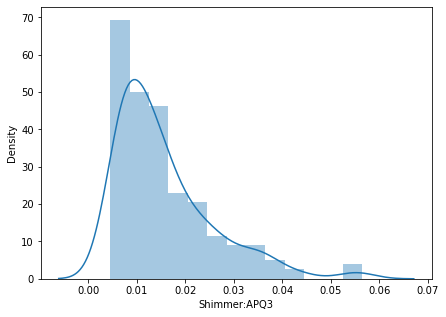

Shimmer:APQ3  skew is:  1.5805763798815677


Column name:  Shimmer:APQ5


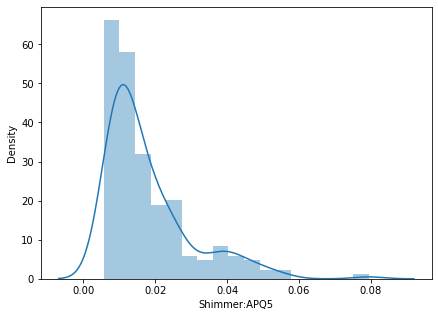

Shimmer:APQ5  skew is:  1.798697066537622


Column name:  MDVP:APQ


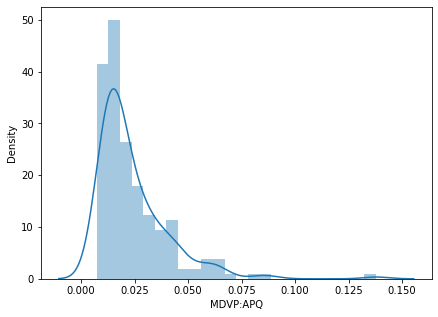

MDVP:APQ  skew is:  2.618046502215422


Column name:  Shimmer:DDA


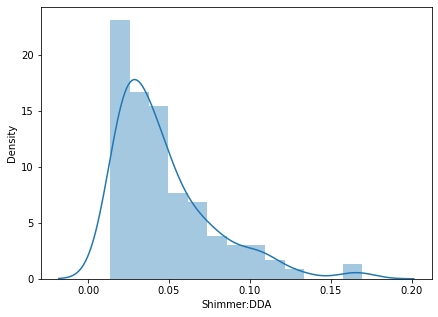

Shimmer:DDA  skew is:  1.5806179936782263


Column name:  NHR


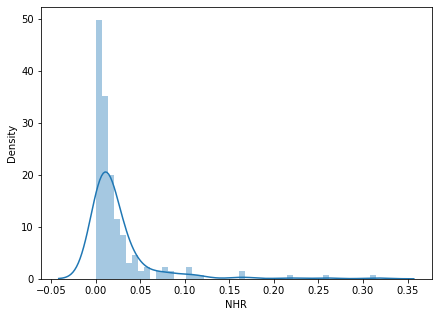

NHR  skew is:  4.22070912913906


Column name:  HNR


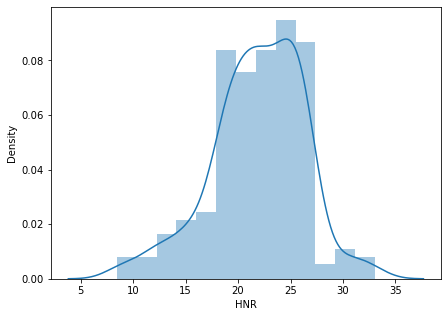

HNR  skew is:  -0.5143174975652068


Column name:  status


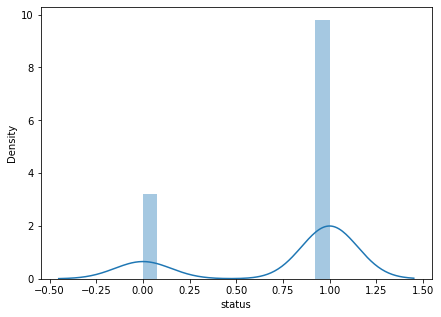

status  skew is:  -1.1877273855919208


Column name:  RPDE


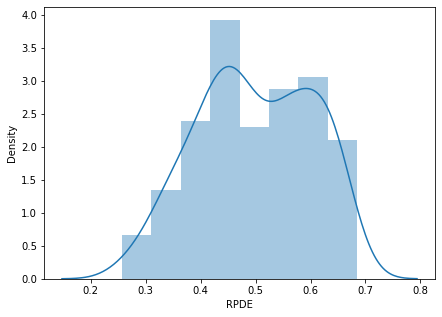

RPDE  skew is:  -0.14340241379821705


Column name:  DFA


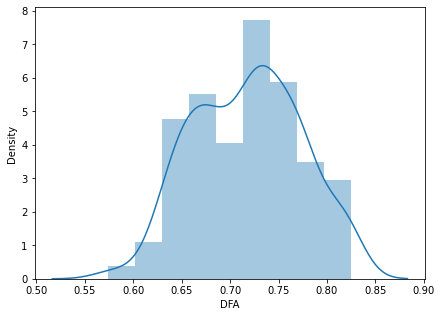

DFA  skew is:  -0.03321366071383484


Column name:  spread1


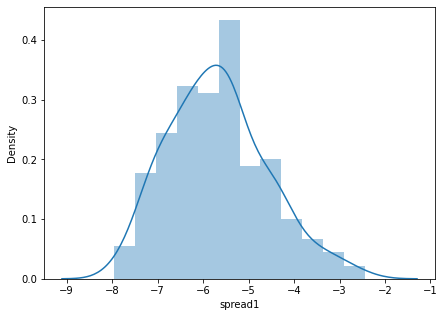

spread1  skew is:  0.4321389320131796


Column name:  spread2


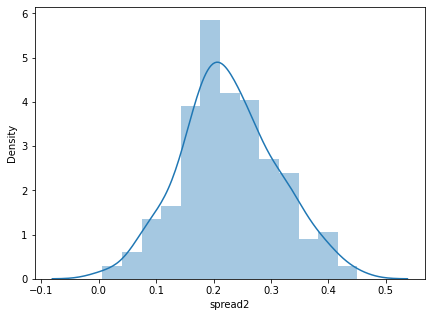

spread2  skew is:  0.14443048549278412


Column name:  D2


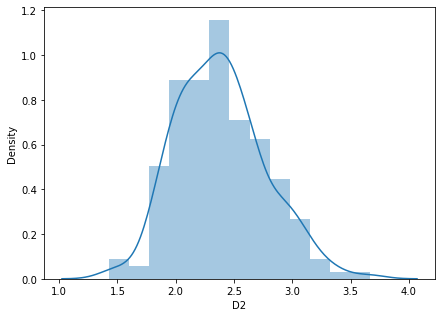

D2  skew is:  0.4303838913329283


Column name:  PPE


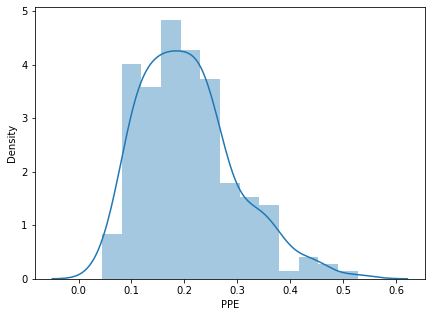

PPE  skew is:  0.7974910716463578




In [7]:
for col in df.columns:
    print('Column name: ',col)
    plt.figure(figsize=(7,5))
    sns.distplot(df[col])
    plt.show()
    print(col,' skew is: ',df[col].skew())
    print('\n')

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

column name:  MDVP:Fo(Hz)


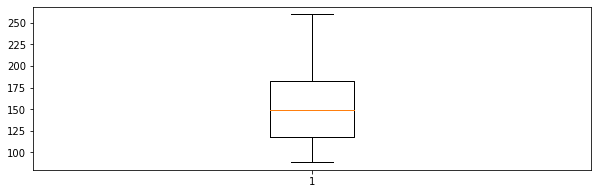

column name:  MDVP:Fhi(Hz)


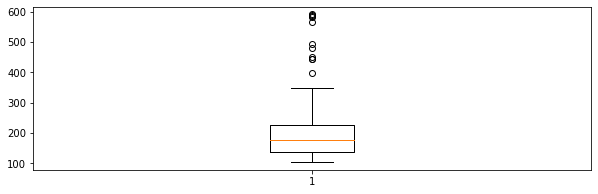

column name:  MDVP:Flo(Hz)


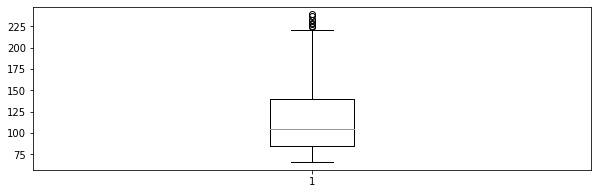

column name:  MDVP:Jitter(%)


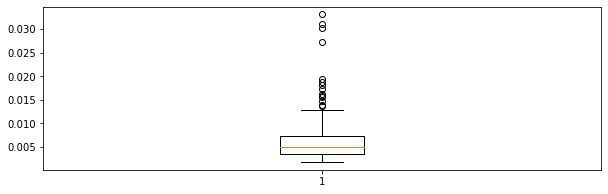

column name:  MDVP:Jitter(Abs)


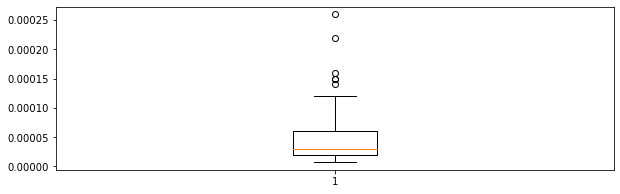

column name:  MDVP:RAP


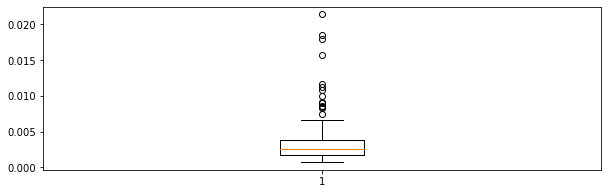

column name:  MDVP:PPQ


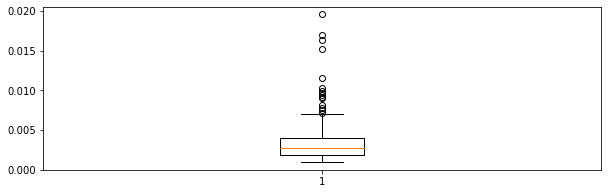

column name:  Jitter:DDP


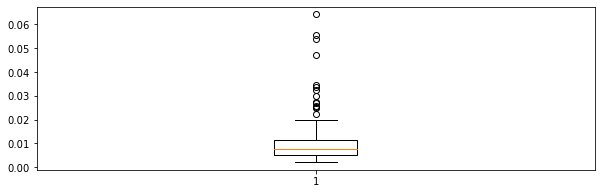

column name:  MDVP:Shimmer


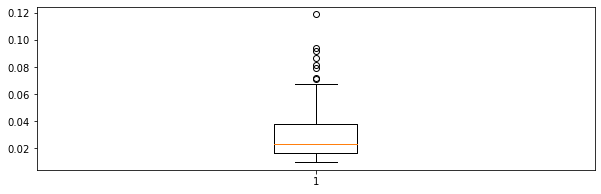

column name:  MDVP:Shimmer(dB)


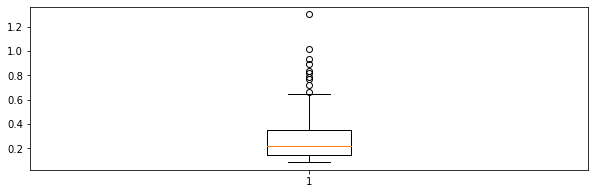

column name:  Shimmer:APQ3


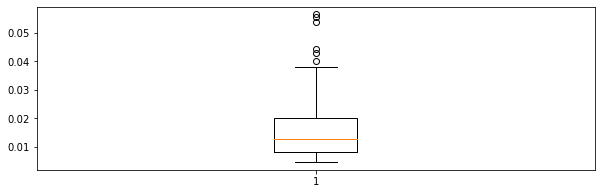

column name:  Shimmer:APQ5


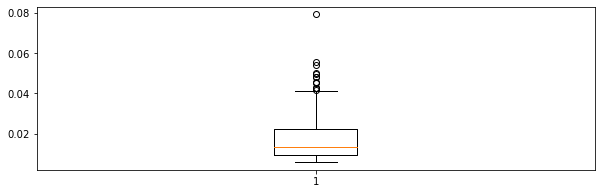

column name:  MDVP:APQ


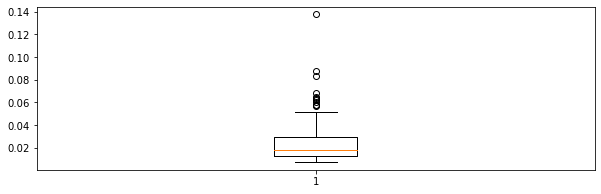

column name:  Shimmer:DDA


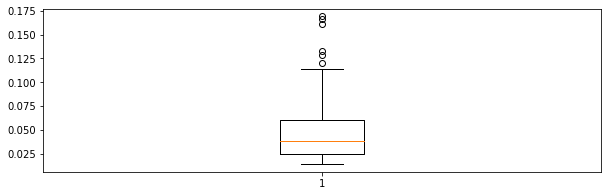

column name:  NHR


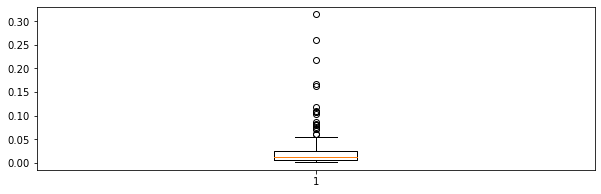

column name:  HNR


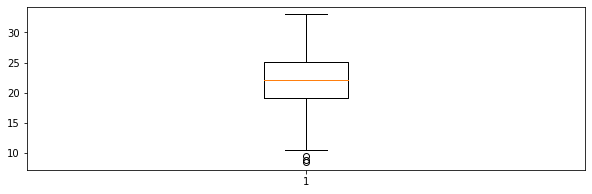

column name:  status


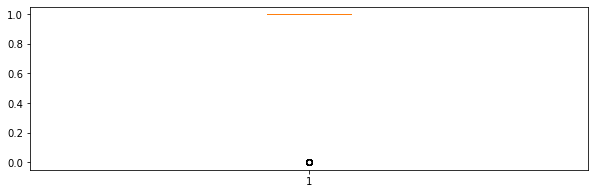

column name:  RPDE


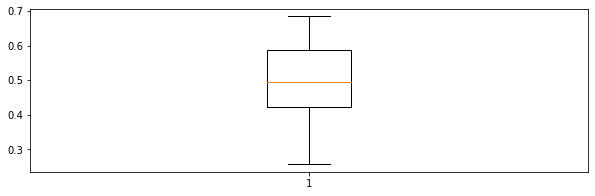

column name:  DFA


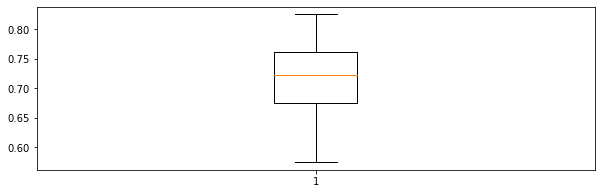

column name:  spread1


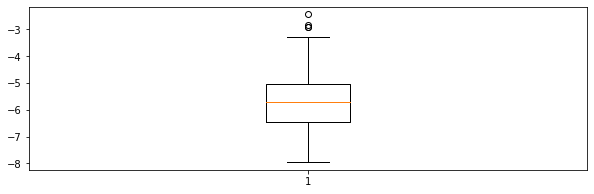

column name:  spread2


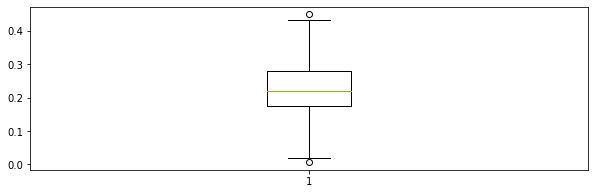

column name:  D2


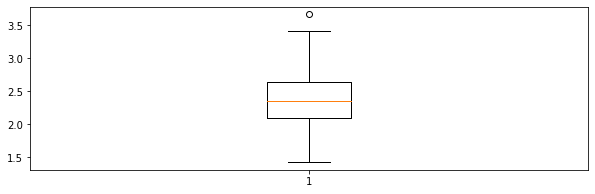

column name:  PPE


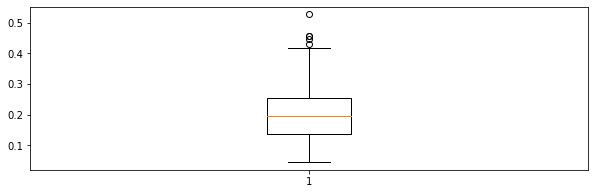

In [8]:
for col in df.columns:
    print('column name: ',col)
    plt.figure(figsize=(10,3))
    plt.boxplot(df[col])
    plt.show()

### Q7. Are there any strong correlations among the independent features?

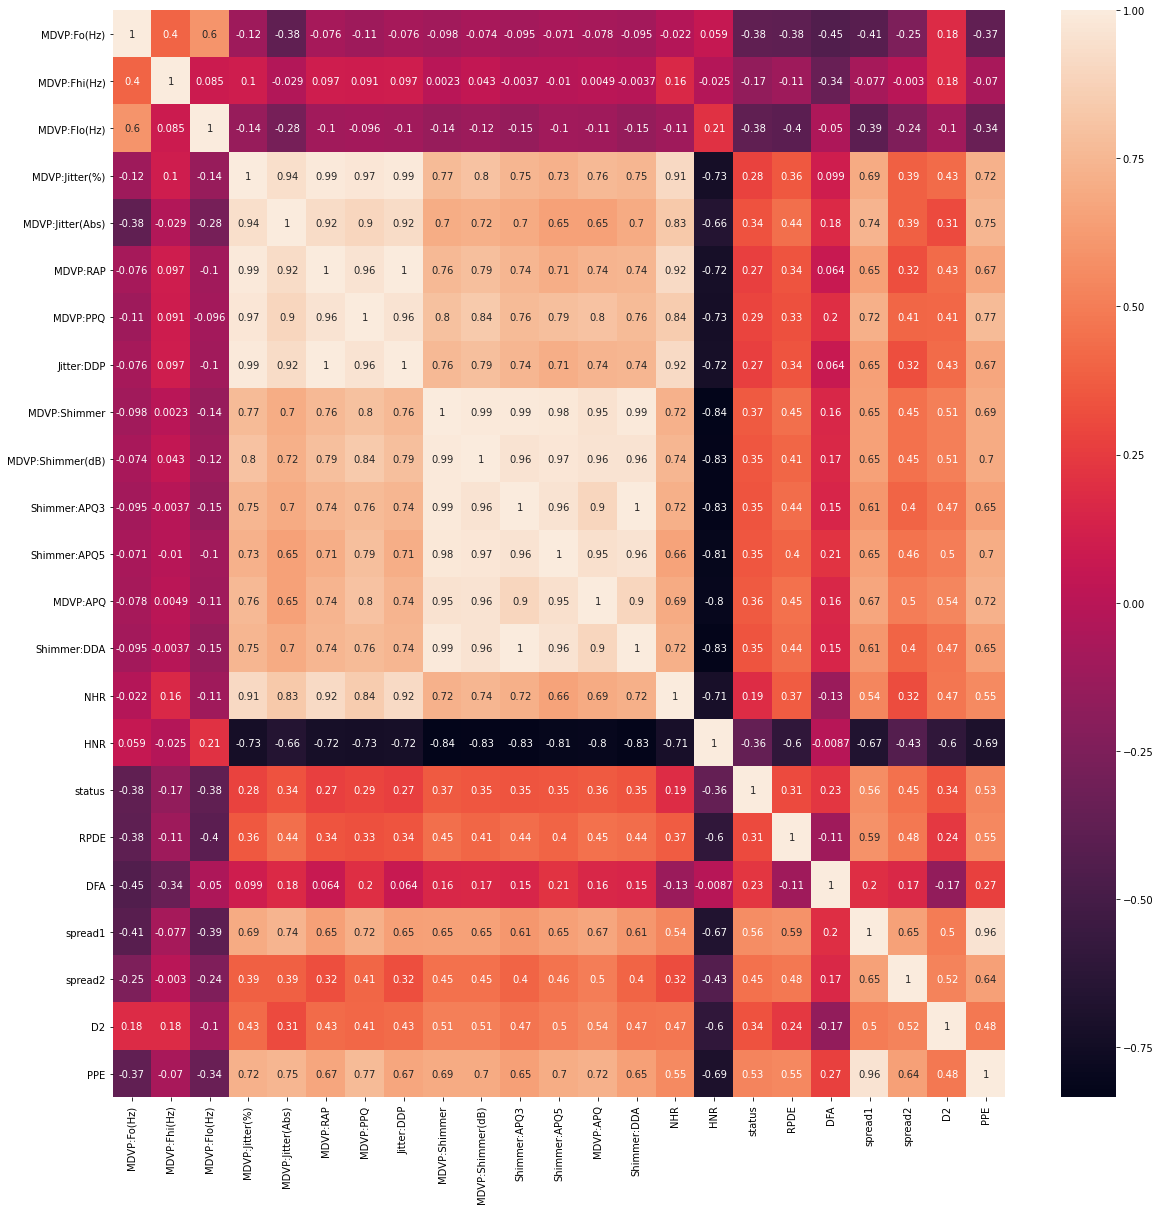

In [9]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

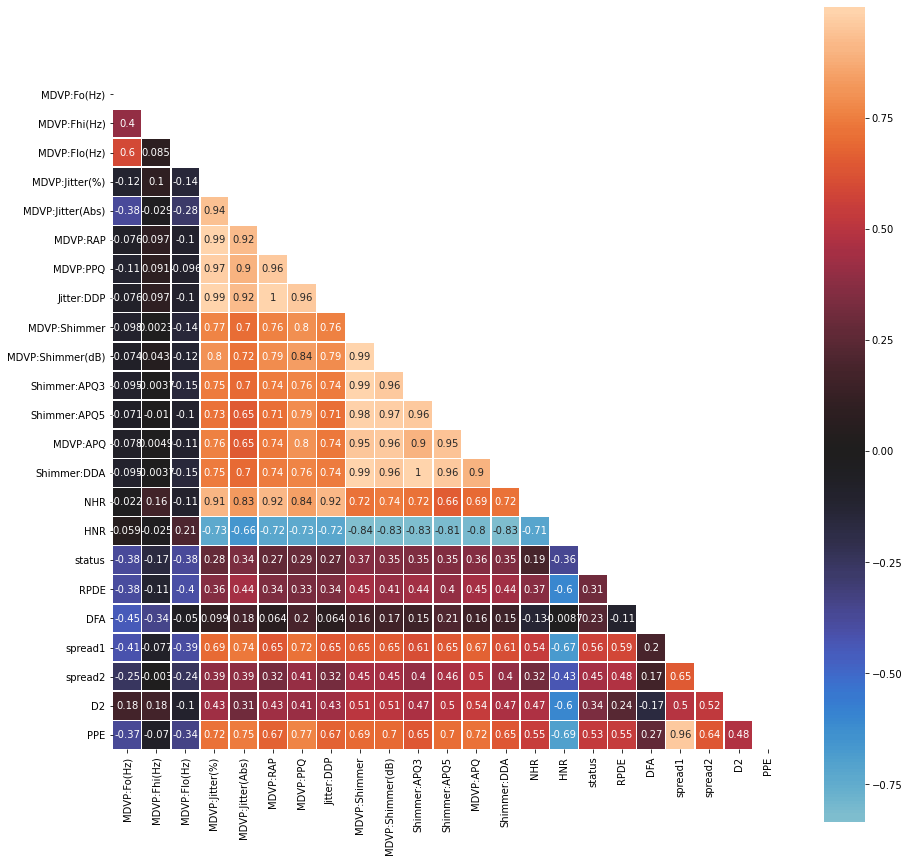

In [10]:
plt.figure(figsize=(15,15))
corr_back = df.corr()
mask = np.zeros_like(corr_back, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_back,mask=mask,center=0,square=True,annot=True,linewidths=0.5)
plt.show()

In [11]:
y = df['status']
X = df.drop('status',axis=1)

import statsmodels.api as sm
xc = sm.add_constant(X)

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vf = [vif(xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame(vf,index=xc.columns,columns=['vif'])

,vif
const,2.451965e+03
MDVP:Fo(Hz),7.101626e+00
MDVP:Fhi(Hz),1.568587e+00
MDVP:Flo(Hz),2.216546e+00
MDVP:Jitter(%),1.919769e+02
MDVP:Jitter(Abs),4.716608e+01
MDVP:RAP,1.394371e+06
MDVP:PPQ,1.080988e+02
Jitter:DDP,1.395141e+06
MDVP:Shimmer,7.597653e+02


Above DataFrame shows that there are strong correlation between independent features

### Q8. Split dataset into training & test dataset  

In [13]:
y = df['status']
X = df.drop('status',axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(195, 22) (136, 22) (136,) (59, 22) (59,)


### Q9. Create a default decision tree model using criterion = Entropy 

In [15]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
y_train_pred = dtc.predict(X_train)
y_train_prob = dtc.predict_proba(X_train)[:,1]

print('Train:-')
print('Confusion_Matrix_Train:-\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy_Train:- ',accuracy_score(y_train,y_train_pred))
print('AUC_Train:- ',roc_auc_score(y_train,y_train_prob))

y_test_pred = dtc.predict(X_test)
y_test_prob = dtc.predict_proba(X_test)[:,1]

print('\nTest:-')
print('Confusion_Matrix_Test:-\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy_Test:- ',accuracy_score(y_test,y_test_pred))
print('AUC_Test:- ',roc_auc_score(y_test,y_test_prob))


Train:-
Confusion_Matrix_Train:-
 [[ 33   0]
 [  0 103]]
Accuracy_Train:-  1.0
AUC_Train:-  1.0

Test:-
Confusion_Matrix_Test:-
 [[11  4]
 [ 2 42]]
Accuracy_Test:-  0.8983050847457628
AUC_Test:-  0.8439393939393941


### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [17]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint

dtc = DecisionTreeClassifier(criterion = 'entropy')

params = {'max_depth' : np.arange(1,50),
         'min_samples_leaf' : np.arange(1,50)}

gsearch = GridSearchCV(dtc, param_grid = params, cv = 3, n_jobs = -1,scoring = 'roc_auc')

gsearch.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='roc_auc')

In [18]:
gsearch.best_params_

{'max_depth': 31, 'min_samples_leaf': 10}

In [19]:
dtc = DecisionTreeClassifier(**gsearch.best_params_,criterion = 'entropy')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=31, min_samples_leaf=10)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
y_train_pred = dtc.predict(X_train)
y_train_prob = dtc.predict_proba(X_train)[:,1]

print('Train:-')
print('Confusion_Matrix_Train:-\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy_Train:- ',accuracy_score(y_train,y_train_pred))
print('AUC_Train:- ',roc_auc_score(y_train,y_train_prob))

y_test_pred = dtc.predict(X_test)
y_test_prob = dtc.predict_proba(X_test)[:,1]

print('\nTest:-')
print('Confusion_Matrix_Test:-\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy_Test:- ',accuracy_score(y_test,y_test_pred))
print('AUC_Test:- ',roc_auc_score(y_test,y_test_prob))


Train:-
Confusion_Matrix_Train:-
 [[32  1]
 [ 9 94]]
Accuracy_Train:-  0.9264705882352942
AUC_Train:-  0.9739629302736099

Test:-
Confusion_Matrix_Test:-
 [[13  2]
 [ 6 38]]
Accuracy_Test:-  0.864406779661017
AUC_Test:-  0.906060606060606


### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

params = {'n_estimators':np.arange(50,400)}

gsearch = GridSearchCV(rfc,param_grid=params,cv=3,n_jobs = -1,scoring='roc_auc')

gsearch.fit(X_train,y_train)

gsearch.best_params_

{'n_estimators': 93}

In [22]:
rfc = RandomForestClassifier(**gsearch.best_params_)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=93)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

In [24]:
y_train_pred = rfc.predict(X_train)
y_train_prob = rfc.predict_proba(X_train)[:,1]

print('Train:- ')
print('Confusion_Matrix_Train:-\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy_Train:- ',accuracy_score(y_train,y_train_pred))
print('AUC_Train:- ',roc_auc_score(y_train,y_train_prob))

y_test_pred = rfc.predict(X_test)
y_test_prob = rfc.predict_proba(X_test)[:,1]

print('\nTest:- ')
print('Confusion_Matrix_Test:-\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy_Test:- ',accuracy_score(y_test,y_test_pred))
print('AUC_Test:- ',roc_auc_score(y_test,y_test_prob))


Train:- 
Confusion_Matrix_Train:-
 [[ 33   0]
 [  0 103]]
Accuracy_Train:-  1.0
AUC_Train:-  0.9999999999999999

Test:- 
Confusion_Matrix_Test:-
 [[12  3]
 [ 0 44]]
Accuracy_Test:-  0.9491525423728814
AUC_Test:-  0.971969696969697
